In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_stocks = pd.read_parquet("/content/drive/MyDrive/stock_pp/data/processed/stocks_clean.parquet")
df_stocks.head()

,date,open,high,low,close,volume,ticker,daily_pct_change,price_range,daily_return,cumulative_return
0,2020-10-26,110.899566,113.370271,109.800390,111.911194,111850700.0,aapl,0.912201,3.569880,NaN,NaN
1,2020-10-27,112.339175,114.080340,111.415096,113.418892,92276800.0,aapl,0.961123,2.665245,1.347227,1.347227
2,2020-10-28,111.911175,112.280806,108.068936,108.166206,143937800.0,aapl,-3.346376,4.211869,-4.631226,-3.346392
3,2020-10-29,109.304306,113.739897,109.138938,112.173820,146129200.0,aapl,2.625253,4.600959,3.705052,0.234674
4,2020-10-30,108.030037,108.934664,104.781163,105.890060,190272600.0,aapl,-1.980909,4.153502,-5.601806,-5.380278


In [ ]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35140 entries, 0 to 35139
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               35140 non-null  datetime64[ns]
 1   open               35140 non-null  float64       
 2   high               35140 non-null  float64       
 3   low                35140 non-null  float64       
 4   close              35140 non-null  float64       
 5   volume             35140 non-null  float64       
 6   ticker             35140 non-null  object        
 7   daily_pct_change   35140 non-null  float64       
 8   price_range        35140 non-null  float64       
 9   daily_return       35112 non-null  float64       
 10  cumulative_return  35112 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 2.9+ MB


In [ ]:
df_news = pd.read_parquet("/content/drive/MyDrive/stock_sentiment_pipeline/data/processed/news_clean.parquet")
df_news.head()

,ticker,date,headline,source,sentiment_label,sentiment_score
0,aapl,2025-10-22,Apple Shares Surge on iPhone Demand,nep123.com,neutral,1.000000
1,aapl,2025-10-22,Samsung and Google's new Galaxy XR headset lay...,yahoo entertainment,neutral,1.000000
2,aapl,2025-10-21,"Stock market today: Dow, S&P 500, Nasdaq futur...",yahoo entertainment,positive,0.999930
3,aapl,2025-10-21,CalDigit、Thunderbolt 5対応のドッキングステーションTS5/TS5 Pl...,applech2.com,negative,0.998592
4,aapl,2025-10-21,Apple shares hit new all-time intraday and clo...,macdailynews.com,negative,0.999995


In [ ]:
df_news['sentiment_label'].value_counts()

,count
sentiment_label,
negative,1031
neutral,336
positive,209


# Univariate EDA

## 1. **Numerical**


missing values of open:
0

statistics of open:
count    35140.000000
mean       166.726073
std        170.842671
min          3.090000
25%         54.403873
50%        125.446258
75%        204.979996
max       1338.229980
Name: open, dtype: float64

skewness of open:
2.7094438177572018


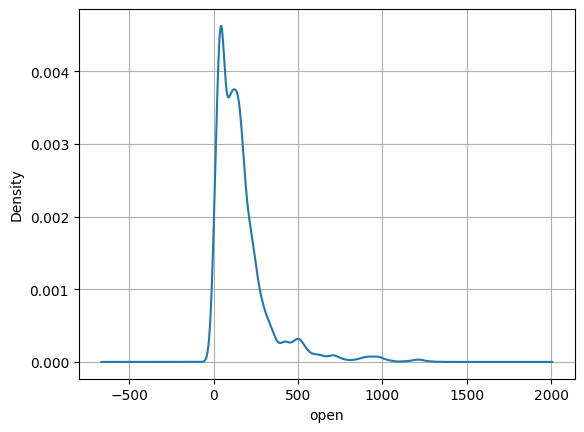

upper bound= 430.84417981120356
lower bound= -171.4603110785685

% of outliers= 7.128628343767786

missing values of high:
0

statistics of high:
count    35140.000000
mean       168.812502
std        172.704740
min          3.360000
25%         54.913535
50%        127.207526
75%        207.939624
max       1341.150024
Name: high, dtype: float64

skewness of high:
2.701425827169872


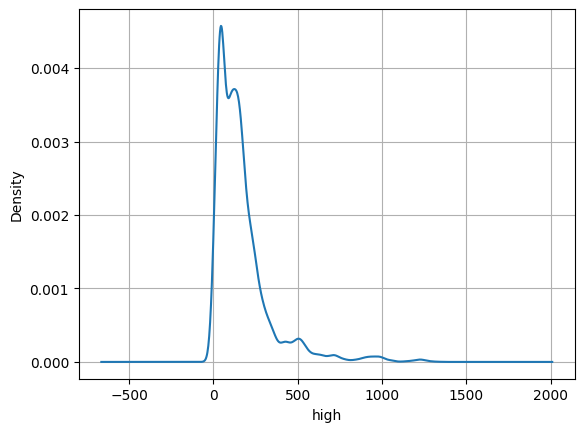

upper bound= 437.47875836683517
lower bound= -174.62559975226034

% of outliers= 7.0830961866818445

missing values of low:
0

statistics of low:
count    35140.000000
mean       164.588617
std        168.885269
min          3.020000
25%         53.777084
50%        123.759615
75%        202.099759
max       1321.209961
Name: low, dtype: float64

skewness of low:
2.7169501538035203


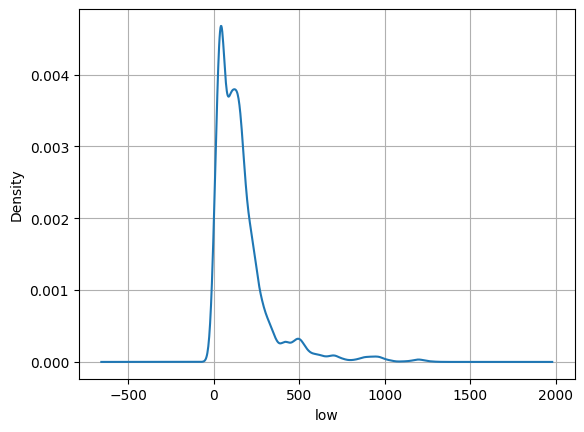

upper bound= 424.5837718949168
lower bound= -168.70692806159863

% of outliers= 7.171314741035856

missing values of close:
0

statistics of close:
count    35140.000000
mean       166.745495
std        170.883763
min          3.140000
25%         54.347559
50%        125.482212
75%        205.315216
max       1339.130005
Name: close, dtype: float64

skewness of close:
2.7107844824564213


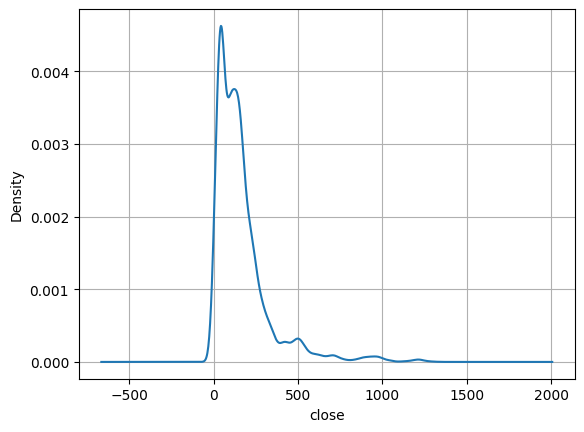

upper bound= 431.76670169830334
lower bound= -172.10392665863043

% of outliers= 7.085941946499715

missing values of volume:
0

statistics of volume:
count    3.514000e+04
mean     2.837411e+07
std      3.286568e+07
min      5.753000e+05
25%      7.640750e+06
50%      1.597375e+07
75%      3.791800e+07
max      6.663786e+08
Name: volume, dtype: float64

skewness of volume:
2.960214114516165


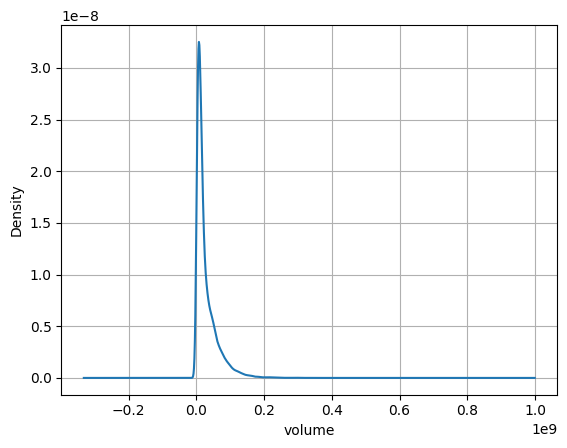

upper bound= 83333875.0
lower bound= -37775125.0

% of outliers= 6.656232214001139

missing values of daily_pct_change:
0

statistics of daily_pct_change:
count    35140.000000
mean         0.027344
std          1.913261
min        -14.242981
25%         -0.915364
50%          0.035653
75%          0.965331
max         22.241852
Name: daily_pct_change, dtype: float64

skewness of daily_pct_change:
0.3066607930070509


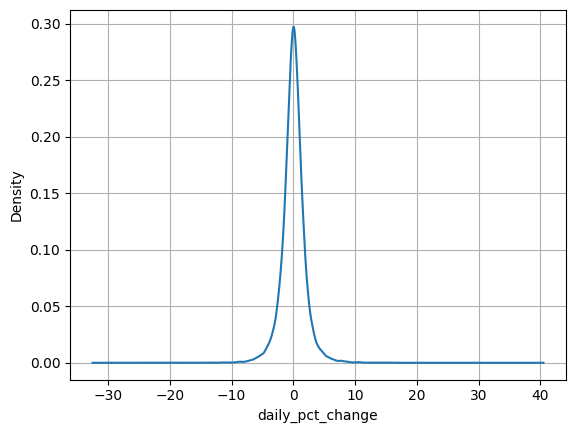

upper bound= 5.767128526657515
lower bound= -5.712439538242261

% of outliers= 1.5907797381900968

missing values of price_range:
0

statistics of price_range:
count    35140.000000
mean         4.223885
std          5.085811
min          0.060000
25%          1.139575
50%          2.610001
75%          5.320007
max         97.029968
Name: price_range, dtype: float64

skewness of price_range:
3.6807910067857716


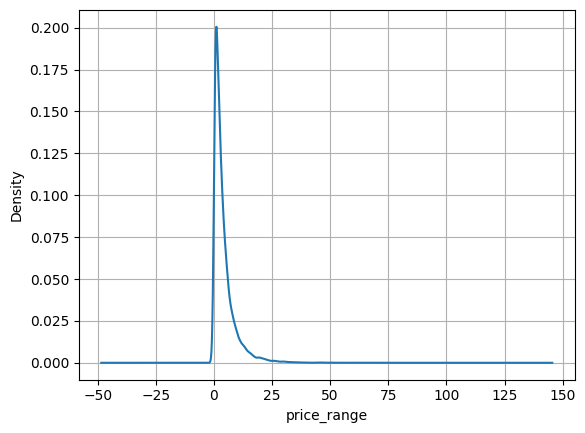

upper bound= 11.590656297498041
lower bound= -5.131074297913402

% of outliers= 7.043255549231644

missing values of daily_return:
28

statistics of daily_return:
count    35112.000000
mean         0.076634
std          2.400892
min        -35.116603
25%         -1.001791
50%          0.069375
75%          1.149953
max         26.445949
Name: daily_return, dtype: float64

skewness of daily_return:
0.22044344311394184


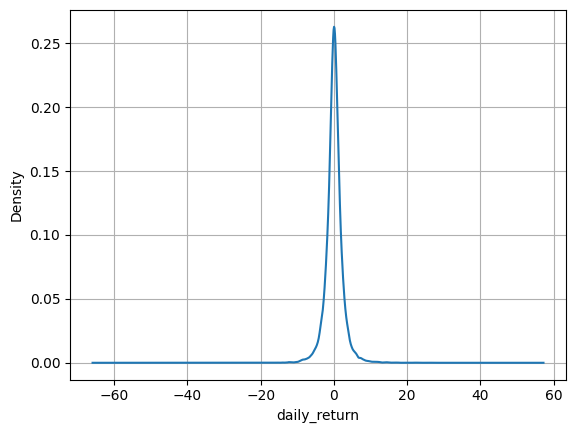

upper bound= 7.279309734451373
lower bound= -7.126041302932799

% of outliers= 1.7116655274550012

missing values of cumulative_return:
28

statistics of cumulative_return:
count    35112.000000
mean        46.183954
std         72.437120
min        -87.927720
25%          0.812854
50%         31.587022
75%         76.397552
max        350.668038
Name: cumulative_return, dtype: float64

skewness of cumulative_return:
1.2507409652062333


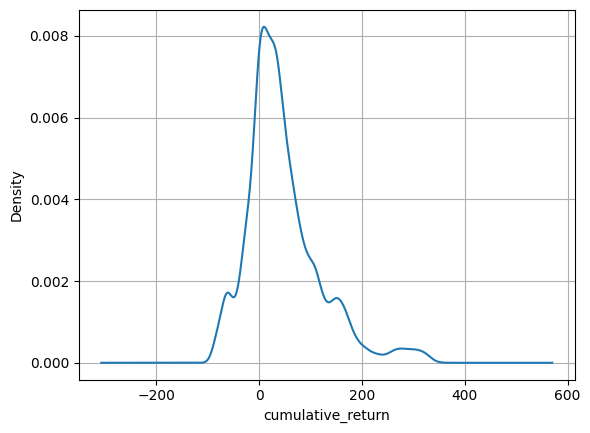

upper bound= 189.77459997696553
lower bound= -112.56419336944805

% of outliers= 4.377420824789246


In [ ]:
#numerical columns:-
num_cols = ['open', 'high', 'low', 'close', 'volume', 'daily_pct_change', 'price_range', 'daily_return', 'cumulative_return']

for col in num_cols:
  print(f'\nmissing values of {col}:')
  print(df_stocks[col].isnull().sum())
  print(f"\nstatistics of {col}:")
  print(df_stocks[col].describe())
  print(f"\nskewness of {col}:")
  print(df_stocks[col].skew())
  df_stocks[col].plot(kind='kde')
  plt.xlabel(col)
  plt.grid(True)
  #plt.savefig(f"{col}_NUM_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
  plt.show()

  if df_stocks[col].skew()>-1 and df_stocks[col].skew()<1:
    uplim = df_stocks[col].mean() + 3*df_stocks[col].std()
    lowlim = df_stocks[col].mean() - 3*df_stocks[col].std()
    print('upper bound=',uplim)
    print('lower bound=',lowlim)
    print(f'\n% of outliers=', df_stocks[(df_stocks[col]>uplim) | (df_stocks[col]<lowlim)][col].count()*100/df_stocks[col].count())
  else:
    q1 = df_stocks[col].quantile(0.25)
    q3 = df_stocks[col].quantile(0.75)
    iqr = q3-q1
    uplim = q3 + 1.5*iqr
    lowlim = q1 - 1.5*iqr
    print('upper bound=',uplim)
    print('lower bound=',lowlim)
    print(f'\n% of outliers=', df_stocks[(df_stocks[col]>uplim) | (df_stocks[col]<lowlim)][col].count()*100/df_stocks[col].count())


## 2. **Categorical**


Number of missing values in ticker:
0

Number of unique categories in ticker:
28

Frequency Distribution of top 10 in ticker (including 'Other'):
ticker
bx       0.052030
zs       0.051396
crm      0.048858
ba       0.046320
nio      0.045685
f        0.044416
vz       0.041878
wmt      0.041244
tsm      0.039340
meta     0.038706
googl    0.037437
intc     0.036802
ko       0.036802
amd      0.036168
bac      0.034898
jpm      0.034264
cost     0.034264
pg       0.034264
nflx     0.033629
aapl     0.032360
Name: proportion, dtype: float64


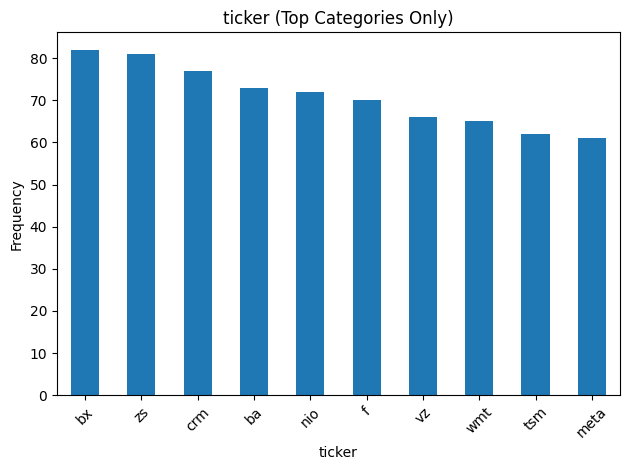


Number of missing values in source:
0

Number of unique categories in source:
394

Frequency Distribution of top 10 in source (including 'Other'):
source
yahoo entertainment    0.121193
biztoc.com             0.076777
barchart.com           0.063452
the times of india     0.048858
forbes                 0.046954
etf daily news         0.036168
globenewswire          0.026015
investopedia           0.024746
marketwatch            0.018401
thestreet              0.016497
pypi.org               0.014594
macdailynews.com       0.013959
nature.com             0.013959
biblegateway.com       0.013325
plos.org               0.010787
financial post         0.009518
biomedcentral.com      0.008883
prtimes.jp             0.007614
wdtprs.com             0.006345
freerepublic.com       0.006345
Name: proportion, dtype: float64


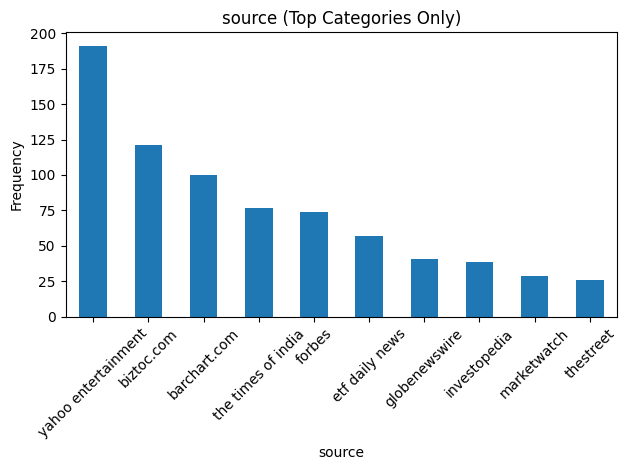

In [ ]:
#categorical columns:-
cat_cols = ['ticker', 'source']

for col in cat_cols:
    print(f"\nNumber of missing values in {col}:")
    print(df_news[df_news[col]=='missing'][col].count())
    print(f"\nNumber of unique categories in {col}:")
    num_unique = df_news[col].nunique()
    print(num_unique)

    if num_unique > 10:
        print(f"\nFrequency Distribution of top 10 in {col} (including 'Other'):")

        top10 = df_news[col].value_counts(normalize=True).nlargest(10)

        temp_col = df_news[col].apply(lambda x: x if x in top10 else 'Other')

        freq = df_news[col].value_counts(normalize=True).nlargest(20)
        print(freq)

        plot_data = temp_col[temp_col != 'Other'].value_counts()
        plot_data.plot(kind='bar', title=f"{col} (Top Categories Only)")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        #plt.savefig(f"{col}_CAT_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
        plt.show()

    else:
        print(f"\nFrequency Distribution of {col}:")
        print(df_news[col].value_counts(normalize=True))
        df_news[col].value_counts().plot(kind='pie', autopct='%0.1f%%', title=col)
        plt.ylabel("")
        plt.tight_layout()
        plt.savefig(f"{col}_CAT_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
        plt.show()


# Bivariate EDA

## 1. **Numerical-Numerical**


the correlation between open and daily_return is =  0.003239462430787927


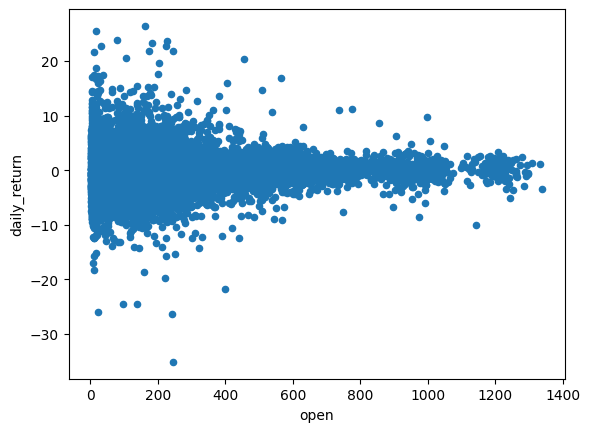


the correlation between high and daily_return is =  0.009693480872880996


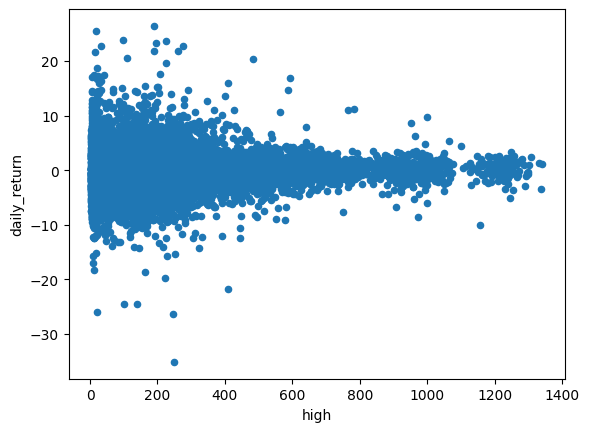


the correlation between low and daily_return is =  0.010060399066194773


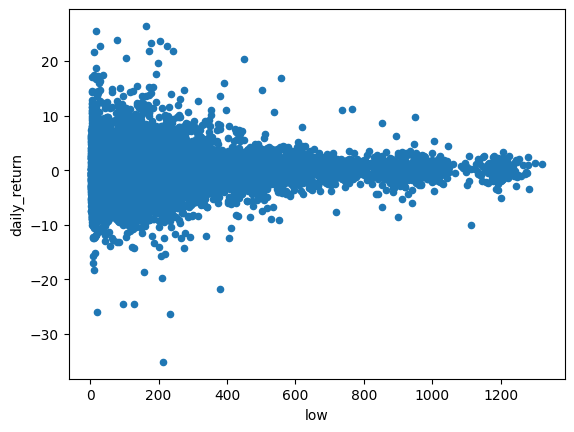


the correlation between close and daily_return is =  0.016208678267389937


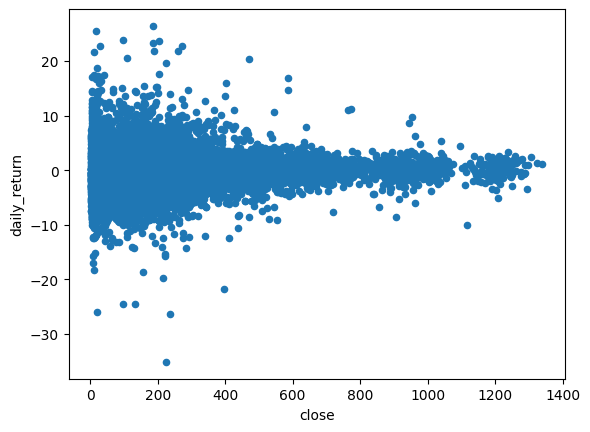


the correlation between volume and daily_return is =  0.029659121980073807


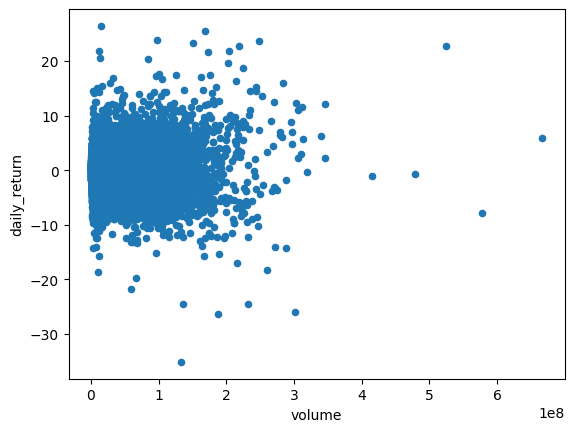


the correlation between daily_pct_change and daily_return is =  0.7879241538226943


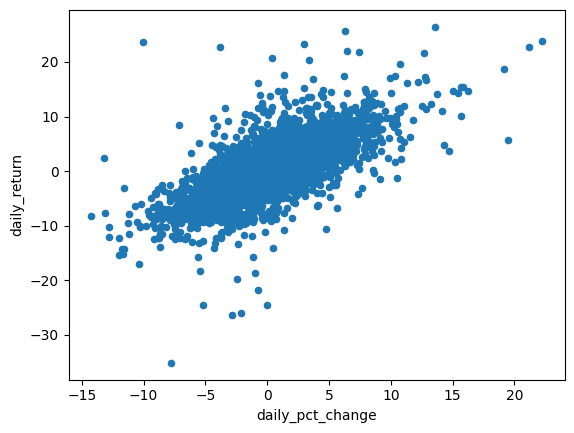


the correlation between price_range and daily_return is =  -0.004905738713606141


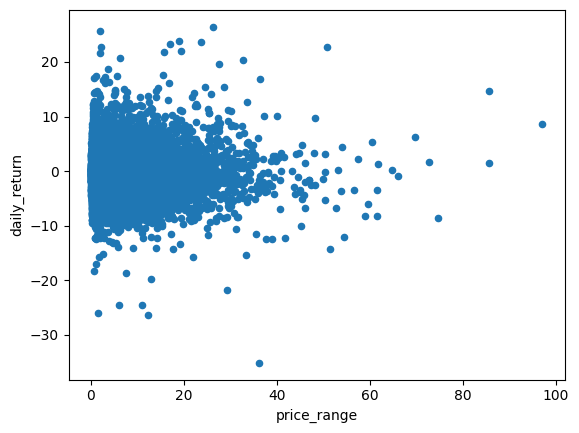


the correlation between cumulative_return and daily_return is =  0.03106053669688009


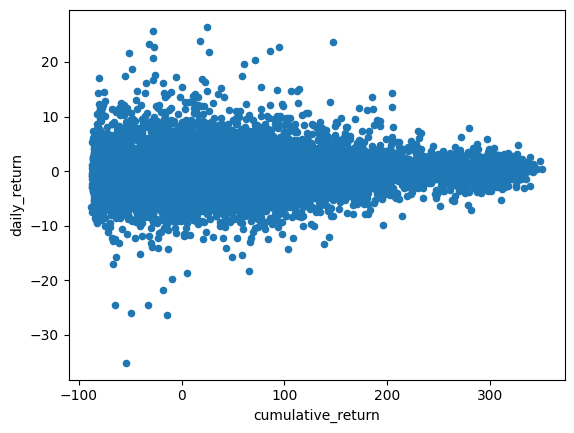

In [ ]:
target = 'daily_return'
num_cols = ['open', 'high', 'low', 'close', 'volume', 'daily_pct_change', 'price_range', 'cumulative_return']

for col in num_cols:
  print(f'\nthe correlation between {col} and {target} is = ', df_stocks[target].corr(df_stocks[col]))
  df_stocks.plot(kind='scatter', x = col, y = target)
  plt.xlabel(col)
  plt.ylabel(target)
  plt.show()

# 2. **Categorical-Numerical**

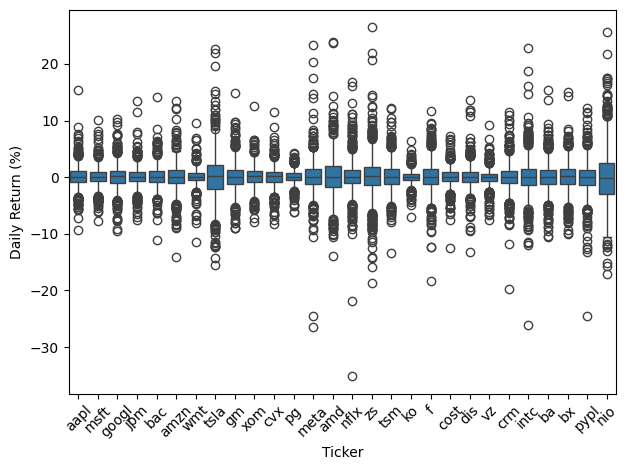

In [ ]:
sns.boxplot(x='ticker', y='daily_return', data=df_stocks)
plt.ylabel("Daily Return (%)")
plt.xlabel("Ticker")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

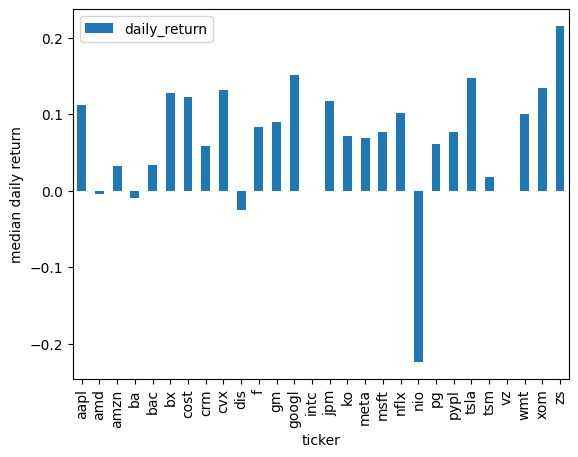

In [ ]:
df_daily_return_median = df_stocks.groupby('ticker')['daily_return'].median().reset_index()
df_daily_return_median.plot(kind = 'bar', x = 'ticker', y = 'daily_return')
plt.xlabel('ticker')
plt.ylabel('median daily return')
plt.show()

# Sentiment Analysis

In [ ]:
df_stocks['return_lag_1'] = df_stocks.groupby('ticker')['daily_return'].shift(1)
df_stocks['return_lag_2'] = df_stocks.groupby('ticker')['daily_return'].shift(2)
df_stocks['return_lag_3'] = df_stocks.groupby('ticker')['daily_return'].shift(3)
df_stocks['return_lead_1'] = df_stocks.groupby('ticker')['daily_return'].shift(-1)
df_stocks['return_lead_2'] = df_stocks.groupby('ticker')['daily_return'].shift(-2)
df_stocks['return_lead_3'] = df_stocks.groupby('ticker')['daily_return'].shift(-3)

In [ ]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35140 entries, 0 to 35139
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               35140 non-null  datetime64[ns]
 1   open               35140 non-null  float64       
 2   high               35140 non-null  float64       
 3   low                35140 non-null  float64       
 4   close              35140 non-null  float64       
 5   volume             35140 non-null  float64       
 6   ticker             35140 non-null  object        
 7   daily_pct_change   35140 non-null  float64       
 8   price_range        35140 non-null  float64       
 9   daily_return       35112 non-null  float64       
 10  cumulative_return  35112 non-null  float64       
 11  return_lag_1       35084 non-null  float64       
 12  return_lag_2       35056 non-null  float64       
 13  return_lag_3       35028 non-null  float64       
 14  return

In [ ]:
merged_df = df_stocks.merge(df_news, on = ['ticker', 'date'], how = 'inner')
merged_df.head()

,date,open,high,low,close,volume,ticker,daily_pct_change,price_range,daily_return,...,return_lag_1,return_lag_2,return_lag_3,return_lead_1,return_lead_2,return_lead_3,headline,source,sentiment_label,sentiment_score
0,2025-10-15,249.490005,251.820007,247.470001,249.339996,33893600.0,aapl,-0.060126,4.350006,0.633649,...,0.044416,0.974436,-3.452208,-0.758001,1.955949,3.943873,"Stock market today: Dow, S&P 500, Nasdaq futur...",yahoo entertainment,neutral,1.000000
1,2025-10-16,248.250000,249.039993,245.130005,247.449997,39777000.0,aapl,-0.322257,3.909988,-0.758001,...,0.633649,0.044416,0.974436,1.955949,3.943873,0.202104,quantlabs added to PyPI,pypi.org,negative,0.999919
2,2025-10-16,248.250000,249.039993,245.130005,247.449997,39777000.0,aapl,-0.322257,3.909988,-0.758001,...,0.633649,0.044416,0.974436,1.955949,3.943873,0.202104,"Stock market today: Dow drops 300 points, S&P ...",yahoo entertainment,positive,0.939258
3,2025-10-16,248.250000,249.039993,245.130005,247.449997,39777000.0,aapl,-0.322257,3.909988,-0.758001,...,0.633649,0.044416,0.974436,1.955949,3.943873,0.202104,Bank of America Warns Intel Stock Could Fall f...,barchart.com,positive,0.937475
4,2025-10-16,248.250000,249.039993,245.130005,247.449997,39777000.0,aapl,-0.322257,3.909988,-0.758001,...,0.633649,0.044416,0.974436,1.955949,3.943873,0.202104,AMZN Stock vs. MSFT Stock,forbes,negative,0.999991


In [ ]:
merged_df.shape

(1335, 21)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               40 non-null     datetime64[ns]
 1   open               40 non-null     float64       
 2   high               40 non-null     float64       
 3   low                40 non-null     float64       
 4   close              40 non-null     float64       
 5   volume             40 non-null     float64       
 6   ticker             40 non-null     object        
 7   daily_pct_change   40 non-null     float64       
 8   price_range        40 non-null     float64       
 9   daily_return       40 non-null     float64       
 10  cumulative_return  40 non-null     float64       
 11  return_lag_1       40 non-null     float64       
 12  return_lag_2       40 non-null     float64       
 13  return_lag_3       40 non-null     float64       
 14  return_lead_

## 1. Sentiment Distribution

In [ ]:
merged_df['sentiment_label'].value_counts()

,count
sentiment_label,
negative,872
neutral,282
positive,181


## 2. Next day median return per sentiment

In [ ]:
senti_df = merged_df.groupby('sentiment_label')['return_lead_1'].median().reset_index()
senti_df

,sentiment_label,return_lead_1
0,negative,-0.223751
1,neutral,-0.278402
2,positive,0.080450


## 3. Previous day median return per sentiment

In [ ]:
senti_df = merged_df.groupby('sentiment_label')['return_lag_1'].median().reset_index()
senti_df

,sentiment_label,return_lag_1
0,negative,0.369890
1,neutral,0.202104
2,positive,0.464239


In [ ]:
label_to_value = {
    'negative': -1,
    'neutral': 0,
    'positive': 1
}

merged_df['sentiment_numeric'] = merged_df['sentiment_label'].map(label_to_value)
merged_df['sentiment_intensity'] = merged_df['sentiment_numeric'] * merged_df['sentiment_score']


In [ ]:
merged_df['sentiment_roll_3d'] = merged_df.groupby('ticker')['sentiment_intensity'].rolling(3).mean().reset_index(0, drop=True)


In [ ]:
corr = merged_df['sentiment_intensity'].corr(merged_df['return_lead_1'])
print("Correlation with next-day return:", corr)


Correlation with next-day return: 0.026575954464614693


In [ ]:
corr = merged_df['sentiment_roll_3d'].corr(merged_df['return_lead_1'])
print("Correlation with next-day return:", corr)


KeyError: 'sentiment_roll_3d'

In [ ]:
corr = merged_df['sentiment_score'].corr(merged_df['daily_return'])
print(corr)

-0.05592282053352029


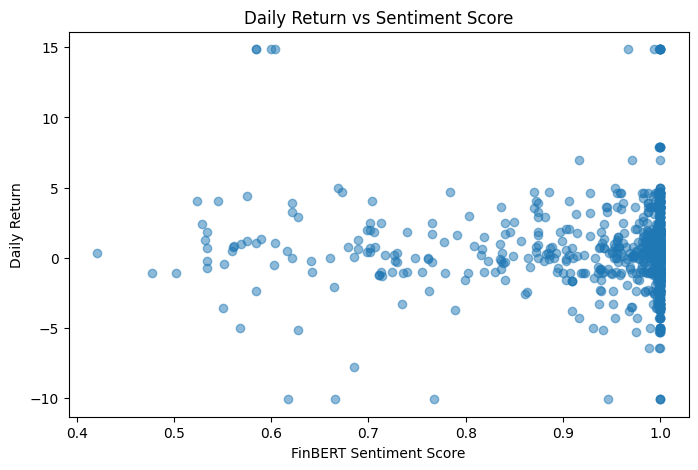

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(merged_df['sentiment_score'], merged_df['daily_return'], alpha=0.5)
plt.xlabel('FinBERT Sentiment Score')
plt.ylabel('Daily Return')
plt.title('Daily Return vs Sentiment Score')
plt.show()

In [ ]:
def signed_score(row):
    if row['sentiment_label'] == 'positive':
        return row['sentiment_score']
    elif row['sentiment_label'] == 'negative':
        return -row['sentiment_score']
    else:  # neutral
        return 0

merged_df['sentiment_signed'] = merged_df.apply(signed_score, axis=1)


In [ ]:
corr_signed = merged_df['sentiment_signed'].corr(merged_df['daily_return'])
print(f"Correlation with signed sentiment score: {corr_signed:.4f}")


Correlation with signed sentiment score: 0.0025


In [ ]:
merged_df = merged_df.sort_values(by = ['ticker','date'])

In [ ]:
merged_df['target_return'] = merged_df.groupby('ticker')['daily_return'].shift(-1)
merged_df.head()

,date,open,high,low,close,volume,ticker,daily_pct_change,price_range,daily_return,...,return_lead_3,headline,source,sentiment_label,sentiment_score,sentiment_numeric,sentiment_intensity,sentiment_roll_3d,sentiment_signed,target_return
0,2025-10-15,249.490005,251.820007,247.470001,249.339996,33893600.0,aapl,-0.060126,4.350006,0.633649,...,3.943873,"Stock market today: Dow, S&P 500, Nasdaq futur...",yahoo entertainment,neutral,1.000000,0,0.000000,NaN,0.000000,-0.758001
1,2025-10-16,248.250000,249.039993,245.130005,247.449997,39777000.0,aapl,-0.322257,3.909988,-0.758001,...,0.202104,quantlabs added to PyPI,pypi.org,negative,0.999919,-1,-0.999919,NaN,-0.999919,-0.758001
2,2025-10-16,248.250000,249.039993,245.130005,247.449997,39777000.0,aapl,-0.322257,3.909988,-0.758001,...,0.202104,"Stock market today: Dow drops 300 points, S&P ...",yahoo entertainment,positive,0.939258,1,0.939258,-0.020220,0.939258,-0.758001
3,2025-10-16,248.250000,249.039993,245.130005,247.449997,39777000.0,aapl,-0.322257,3.909988,-0.758001,...,0.202104,Bank of America Warns Intel Stock Could Fall f...,barchart.com,positive,0.937475,1,0.937475,0.292271,0.937475,-0.758001
4,2025-10-16,248.250000,249.039993,245.130005,247.449997,39777000.0,aapl,-0.322257,3.909988,-0.758001,...,0.202104,AMZN Stock vs. MSFT Stock,forbes,negative,0.999991,-1,-0.999991,0.292247,-0.999991,-0.758001


1.8396286448169972


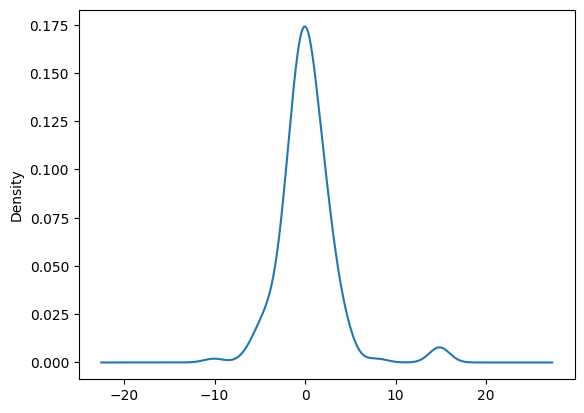

In [ ]:
print(merged_df[merged_df['sentiment_label'] == 'positive']['target_return'].skew())
merged_df[merged_df['sentiment_label'] == 'positive']['target_return'].plot(kind='kde')
plt.show()

In [ ]:
senti_df = merged_df.groupby('sentiment_label')['target_return'].median().reset_index()
senti_df

,sentiment_label,target_return
0,negative,0.019086
1,neutral,0.202104
2,positive,0.052544


In [ ]:
senti_df

,sentiment_label,target_return
0,negative,0.019086
1,neutral,0.202104
2,positive,0.052544


In [ ]:
merged_df[['headline', 'sentiment_label', 'sentiment_score']].sample(20)

,headline,sentiment_label,sentiment_score
1068,Show HN: A lightweight production-ready PHP RE...,negative,0.987238
197,Cops Awaiting Paul Pierce Blood Test Results A...,negative,0.997656
231,With Apple stock near a record high as earning...,negative,0.874475
476,Glen Powell's Birthday Gets Steamy Thanks to J...,negative,0.955911
722,「20th ANNIVERSARY 渋谷音楽祭2025 」全コンテンツ情報解禁！,negative,0.999889
642,"Amid Oasis Tour And New Solo Album, Richard As...",negative,0.999985
1321,Singapore's GIC sues Chinese EV maker Nio over...,positive,0.999975
303,Tesla’s China Shipments Are on the Rise. Shoul...,negative,0.998947
1161,Western Media Finally Admit That Trump’s Mobil...,negative,0.996895
307,Jack Dorsey drops one-word response to Elon Mu...,negative,0.999991


In [ ]:
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df_news['sentiment_numeric'] = df_news['sentiment_label'].map(sentiment_map)
df_news.head()

,ticker,date,headline,source,sentiment_label,sentiment_score,sentiment_numeric
0,aapl,2025-10-22,Apple Shares Surge on iPhone Demand,nep123.com,neutral,1.000000,0
1,aapl,2025-10-22,Samsung and Google's new Galaxy XR headset lay...,yahoo entertainment,neutral,1.000000,0
2,aapl,2025-10-21,"Stock market today: Dow, S&P 500, Nasdaq futur...",yahoo entertainment,positive,0.999930,1
3,aapl,2025-10-21,CalDigit、Thunderbolt 5対応のドッキングステーションTS5/TS5 Pl...,applech2.com,negative,0.998592,-1
4,aapl,2025-10-21,Apple shares hit new all-time intraday and clo...,macdailynews.com,negative,0.999995,-1


In [ ]:
daily_sentiment = (
    df_news.groupby(['ticker', 'date'])['sentiment_numeric']
    .mean()
    .reset_index()
)

In [ ]:
merged = df_stocks.merge(daily_sentiment, on=['ticker', 'date'], how='inner')
merged.head()

,date,open,high,low,close,volume,ticker,daily_pct_change,price_range,daily_return,cumulative_return,return_lag_1,return_lag_2,return_lag_3,return_lead_1,return_lead_2,return_lead_3,sentiment_numeric
0,2025-10-15,249.490005,251.820007,247.470001,249.339996,33893600.0,aapl,-0.060126,4.350006,0.633649,122.801659,0.044416,0.974436,-3.452208,-0.758001,1.955949,3.943873,0.000000
1,2025-10-16,248.250000,249.039993,245.130005,247.449997,39777000.0,aapl,-0.322257,3.909988,-0.758001,121.112820,0.633649,0.044416,0.974436,1.955949,3.943873,0.202104,0.000000
2,2025-10-17,248.020004,253.380005,247.270004,252.289993,49147000.0,aapl,1.721631,6.110001,1.955949,125.437675,-0.758001,0.633649,0.044416,3.943873,0.202104,-1.644015,-0.375000
3,2025-10-20,255.889999,264.380005,255.630005,262.239990,90483000.0,aapl,2.481531,8.750000,3.943873,134.328650,1.955949,-0.758001,0.633649,0.202104,-1.644015,0.437212,-0.307692
4,2025-10-21,261.880005,265.290009,261.829987,262.769989,46695900.0,aapl,0.339844,3.460022,0.202104,134.802239,3.943873,1.955949,-0.758001,-1.644015,0.437212,NaN,-0.153846


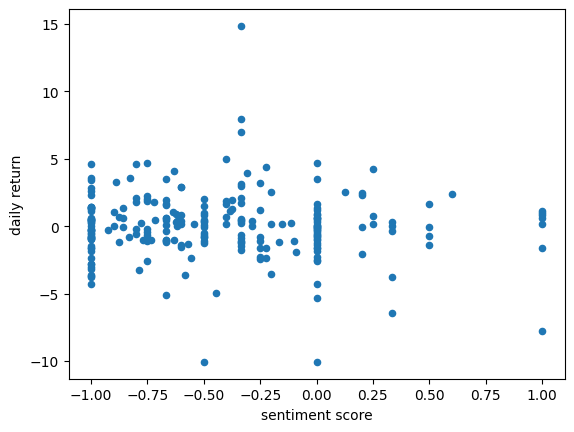

In [ ]:
merged.plot(kind='scatter', x = 'sentiment_numeric', y = 'daily_return')
plt.xlabel('sentiment score')
plt.ylabel('daily return')
plt.show()

In [ ]:
df_stocks = pd.read_parquet("/content/drive/MyDrive/stock_pp/data/processed/stocks_clean.parquet")
df_stocks.head()

,date,open,high,low,close,volume,ticker,daily_pct_change,price_range,daily_return,cumulative_return
0,2020-10-26,110.899566,113.370271,109.800390,111.911194,111850700.0,aapl,0.912201,3.569880,NaN,NaN
1,2020-10-27,112.339175,114.080340,111.415096,113.418892,92276800.0,aapl,0.961123,2.665245,1.347227,1.347227
2,2020-10-28,111.911175,112.280806,108.068936,108.166206,143937800.0,aapl,-3.346376,4.211869,-4.631226,-3.346392
3,2020-10-29,109.304306,113.739897,109.138938,112.173820,146129200.0,aapl,2.625253,4.600959,3.705052,0.234674
4,2020-10-30,108.030037,108.934664,104.781163,105.890060,190272600.0,aapl,-1.980909,4.153502,-5.601806,-5.380278


In [ ]:
df_stocks = df_stocks[df_stocks['ticker'] == 'googl']
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 2510 to 3764
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1255 non-null   datetime64[ns]
 1   open               1255 non-null   float64       
 2   high               1255 non-null   float64       
 3   low                1255 non-null   float64       
 4   close              1255 non-null   float64       
 5   volume             1255 non-null   float64       
 6   ticker             1255 non-null   object        
 7   daily_pct_change   1255 non-null   float64       
 8   price_range        1255 non-null   float64       
 9   daily_return       1254 non-null   float64       
 10  cumulative_return  1254 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 117.7+ KB


In [ ]:
df_news = pd.read_parquet("/content/drive/MyDrive/stock_pp/data/processed/news_clean.parquet")
df_news.head()

,ticker,date,headline,source,sentiment_label,sentiment_score
0,aapl,2025-10-23,"US stock market futures today: Dow Jones, S&P ...",the times of india,positive,0.975183
1,aapl,2025-10-23,Why Cash Flow from Operations Isn’t My First S...,thedividendguyblog.com,negative,0.997731
2,aapl,2025-10-23,Apple Q4 Preview: Earnings Quality And Margin ...,seeking alpha,neutral,1.000000
3,aapl,2025-10-22,Jim Cramer Discusses Apple (AAPL)’s “Super Mis...,yahoo entertainment,negative,0.990823
4,aapl,2025-10-22,"Tesla Posts Return to Revenue Growth, Though Q...",investopedia,positive,0.656045


In [ ]:
df_news = df_news[df_news['ticker'] == 'googl']

In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 107 to 162
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ticker           56 non-null     object        
 1   date             56 non-null     datetime64[ns]
 2   headline         56 non-null     object        
 3   source           56 non-null     object        
 4   sentiment_label  56 non-null     object        
 5   sentiment_score  56 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.1+ KB


#Univariate (numerical)


missing values of open:
0

statistics of open:
count    1255.000000
mean      137.664219
std        35.580717
min        75.331424
25%       110.728049
50%       134.654759
75%       162.393854
max       254.740005
Name: open, dtype: float64

skewness of open:
0.8091936869389041


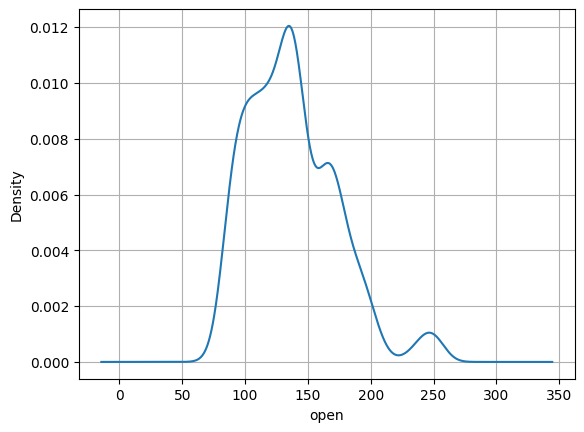

upper bound= 244.40637159832687
lower bound= 30.922066865612635

% of outliers= 1.8326693227091633

missing values of high:
0

statistics of high:
count    1255.000000
mean      139.259129
std        35.893792
min        77.158335
25%       112.450669
50%       135.972718
75%       163.996789
max       257.329987
Name: high, dtype: float64

skewness of high:
0.8213217797949262


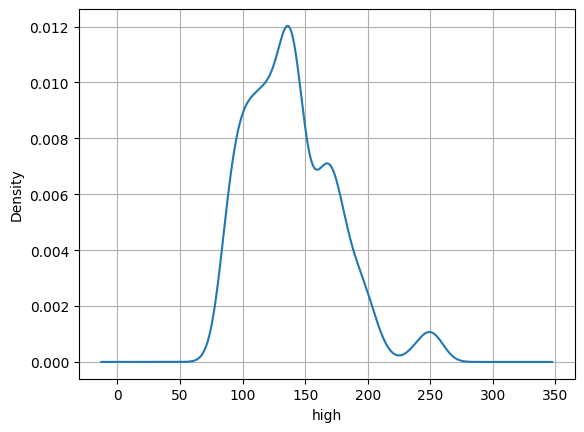

upper bound= 246.94050619914262
lower bound= 31.577752646641926

% of outliers= 1.593625498007968

missing values of low:
0

statistics of low:
count    1255.000000
mean      136.171589
std        35.244937
min        74.907365
25%       109.595109
50%       133.151650
75%       160.646624
max       254.229996
Name: low, dtype: float64

skewness of low:
0.8069880106864215


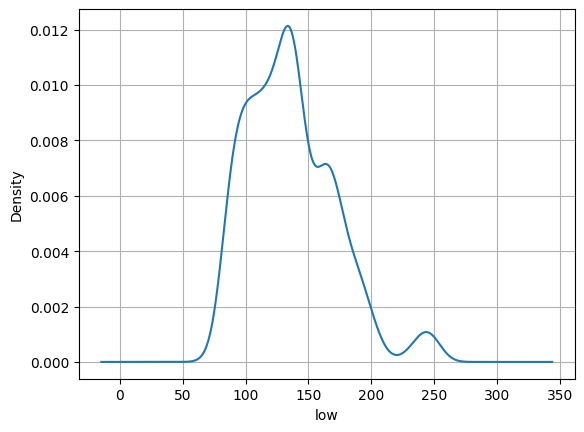

upper bound= 241.90640169456734
lower bound= 30.43677683199624

% of outliers= 1.6733067729083666

missing values of close:
0

statistics of close:
count    1255.000000
mean      137.754406
std        35.624433
min        75.022568
25%       111.072422
50%       134.730759
75%       162.022499
max       256.549988
Name: close, dtype: float64

skewness of close:
0.8201358096010405


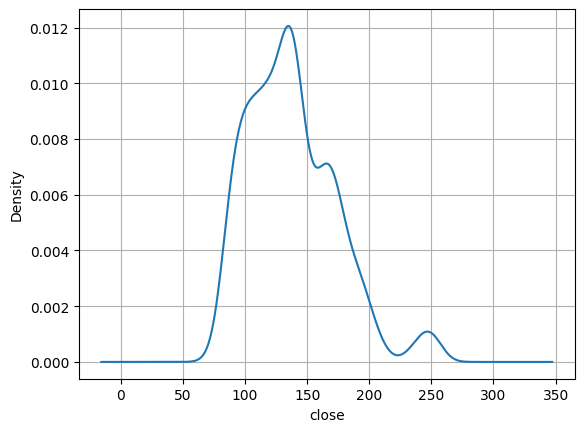

upper bound= 244.62770424135738
lower bound= 30.881106852159178

% of outliers= 1.8326693227091633

missing values of volume:
0

statistics of volume:
count    1.255000e+03
mean     3.211124e+07
std      1.371589e+07
min      9.312000e+06
25%      2.331005e+07
50%      2.873000e+07
75%      3.655800e+07
max      1.274901e+08
Name: volume, dtype: float64

skewness of volume:
2.2650889786487385


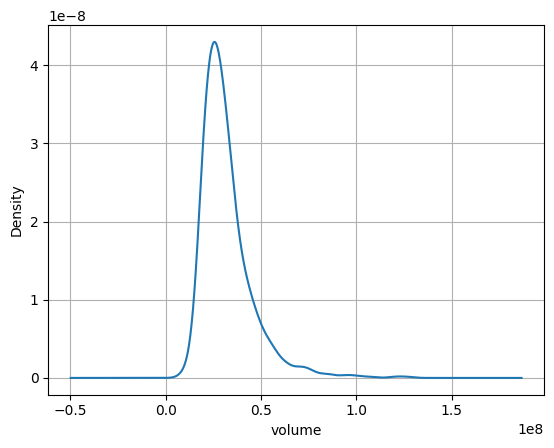

upper bound= 56429925.0
lower bound= 3438125.0

% of outliers= 5.338645418326693

missing values of daily_pct_change:
0

statistics of daily_pct_change:
count    1255.000000
mean        0.077790
std         1.509777
min        -7.740125
25%        -0.828375
50%         0.119438
75%         1.000498
max         9.894757
Name: daily_pct_change, dtype: float64

skewness of daily_pct_change:
0.12207338880000984


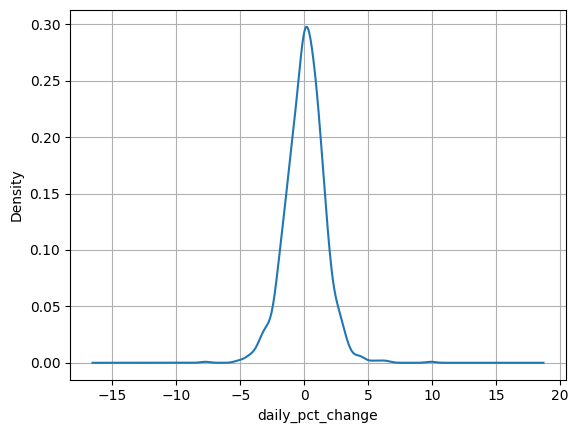

upper bound= 4.607122185662698
lower bound= -4.451541254230277

% of outliers= 0.796812749003984

missing values of price_range:
0

statistics of price_range:
count    1255.000000
mean        3.087540
std         1.605806
min         0.750318
25%         2.030994
50%         2.701369
75%         3.721757
max        17.123940
Name: price_range, dtype: float64

skewness of price_range:
2.1973169280268636


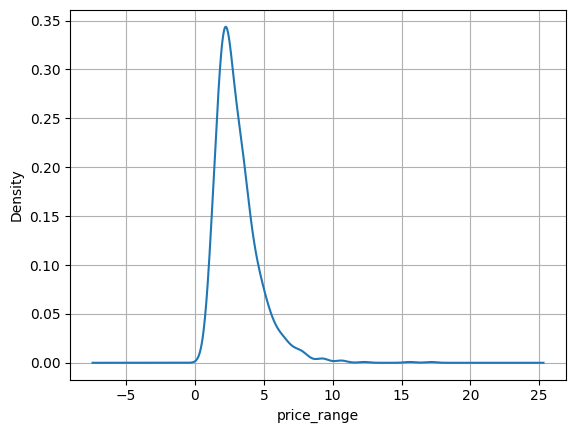

upper bound= 6.257902541327688
lower bound= -0.5051510879906473

% of outliers= 4.302788844621514

missing values of daily_return:
1

statistics of daily_return:
count    1254.000000
mean        0.112234
std         1.952100
min        -9.509396
25%        -0.943900
50%         0.151313
75%         1.129887
max        10.224358
Name: daily_return, dtype: float64

skewness of daily_return:
0.0898982882315885


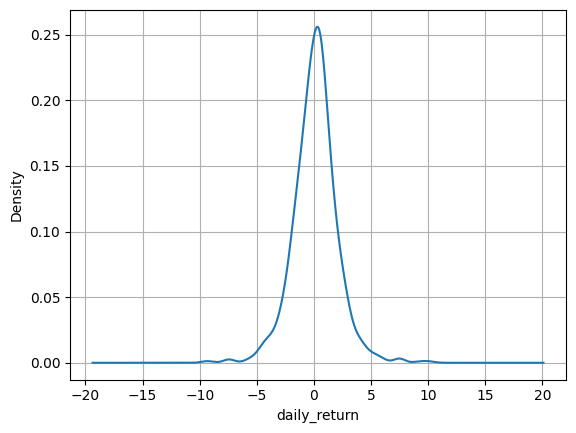

upper bound= 5.968534905433657
lower bound= -5.744066267481497

% of outliers= 1.3556618819776713

missing values of cumulative_return:
1

statistics of cumulative_return:
count    1254.000000
mean       75.159777
std        45.250602
min        -4.638671
25%        41.277794
50%        71.269132
75%       105.951555
max       226.101181
Name: cumulative_return, dtype: float64

skewness of cumulative_return:
0.8221940236790157


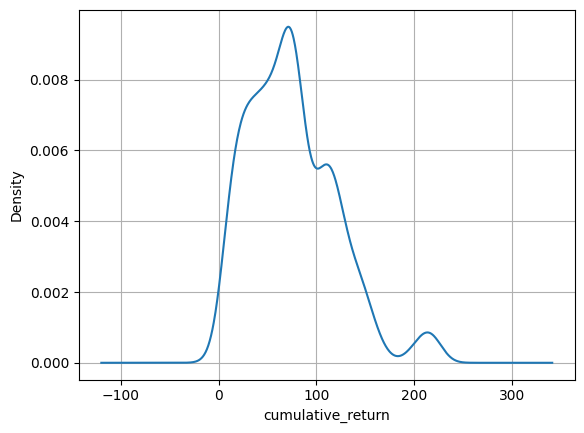

upper bound= 210.9115834910582
lower bound= -60.59202979226997

% of outliers= 1.9138755980861244


In [ ]:
#numerical columns:-
num_cols = ['open', 'high', 'low', 'close', 'volume', 'daily_pct_change', 'price_range', 'daily_return', 'cumulative_return']

for col in num_cols:
  print(f'\nmissing values of {col}:')
  print(df_stocks[col].isnull().sum())
  print(f"\nstatistics of {col}:")
  print(df_stocks[col].describe())
  print(f"\nskewness of {col}:")
  print(df_stocks[col].skew())
  df_stocks[col].plot(kind='kde')
  plt.xlabel(col)
  plt.grid(True)
  #plt.savefig(f"{col}_NUM_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
  plt.show()

  if df_stocks[col].skew()>-1 and df_stocks[col].skew()<1:
    uplim = df_stocks[col].mean() + 3*df_stocks[col].std()
    lowlim = df_stocks[col].mean() - 3*df_stocks[col].std()
    print('upper bound=',uplim)
    print('lower bound=',lowlim)
    print(f'\n% of outliers=', df_stocks[(df_stocks[col]>uplim) | (df_stocks[col]<lowlim)][col].count()*100/df_stocks[col].count())
  else:
    q1 = df_stocks[col].quantile(0.25)
    q3 = df_stocks[col].quantile(0.75)
    iqr = q3-q1
    uplim = q3 + 1.5*iqr
    lowlim = q1 - 1.5*iqr
    print('upper bound=',uplim)
    print('lower bound=',lowlim)
    print(f'\n% of outliers=', df_stocks[(df_stocks[col]>uplim) | (df_stocks[col]<lowlim)][col].count()*100/df_stocks[col].count())



Number of missing values in source:
0

Number of unique categories in source:
18

Frequency Distribution of top 10 in source (including 'Other'):
source
yahoo entertainment             0.196429
forbes                          0.142857
barchart.com                    0.125000
the times of india              0.107143
biztoc.com                      0.107143
pypi.org                        0.035714
investopedia                    0.035714
international business times    0.035714
slashdot.org                    0.035714
macdailynews.com                0.035714
seeking alpha                   0.017857
thestreet                       0.017857
investor's business daily       0.017857
rolling out                     0.017857
financial post                  0.017857
globenewswire                   0.017857
coindesk                        0.017857
marketwatch                     0.017857
Name: proportion, dtype: float64


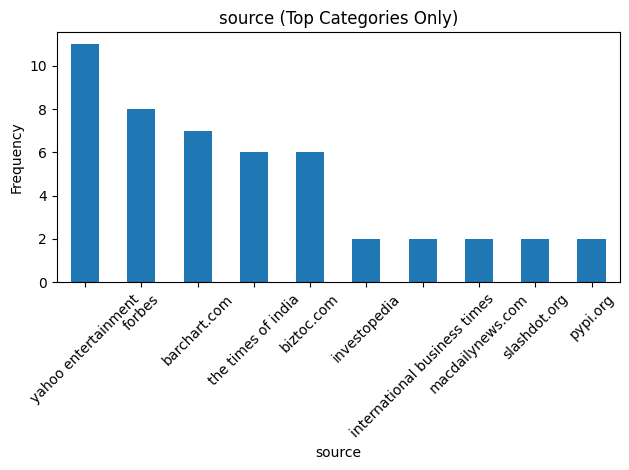

In [ ]:
#categorical columns:-
cat_cols = ['source']

for col in cat_cols:
    print(f"\nNumber of missing values in {col}:")
    print(df_news[df_news[col]=='missing'][col].count())
    print(f"\nNumber of unique categories in {col}:")
    num_unique = df_news[col].nunique()
    print(num_unique)

    if num_unique > 10:
        print(f"\nFrequency Distribution of top 10 in {col} (including 'Other'):")

        top10 = df_news[col].value_counts(normalize=True).nlargest(10)

        temp_col = df_news[col].apply(lambda x: x if x in top10 else 'Other')

        freq = df_news[col].value_counts(normalize=True).nlargest(20)
        print(freq)

        plot_data = temp_col[temp_col != 'Other'].value_counts()
        plot_data.plot(kind='bar', title=f"{col} (Top Categories Only)")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        #plt.savefig(f"{col}_CAT_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
        plt.show()

    else:
        print(f"\nFrequency Distribution of {col}:")
        print(df_news[col].value_counts(normalize=True))
        df_news[col].value_counts().plot(kind='pie', autopct='%0.1f%%', title=col)
        plt.ylabel("")
        plt.tight_layout()
        plt.savefig(f"{col}_CAT_univar.png", dpi=300, bbox_inches="tight")  # save as PNG
        plt.show()



the correlation between open and close is =  0.9983157557780798


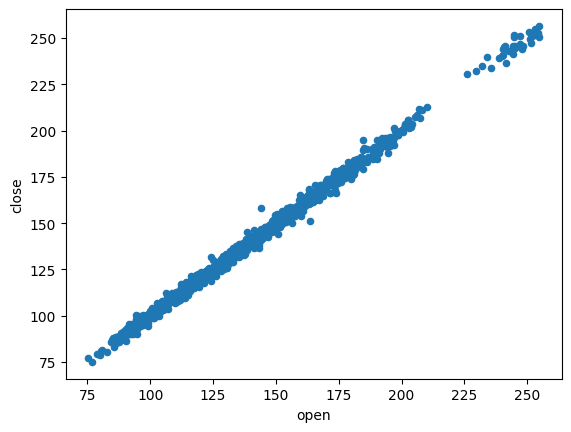


the correlation between high and close is =  0.9992450187054023


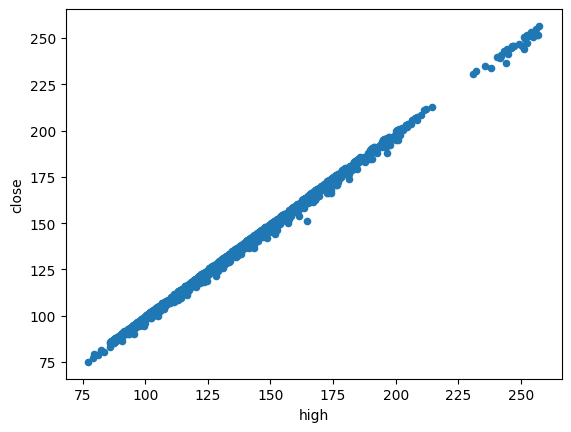


the correlation between low and close is =  0.9993446813815183


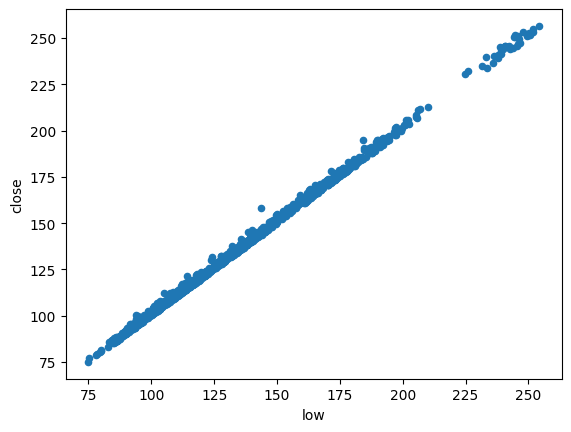


the correlation between volume and close is =  -0.0890582887502422


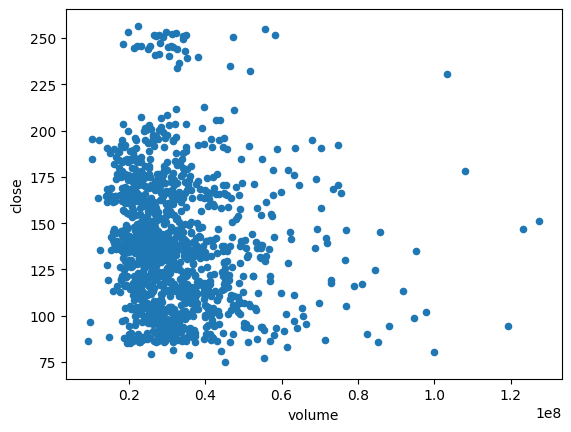


the correlation between daily_return and close is =  0.05055111571724986


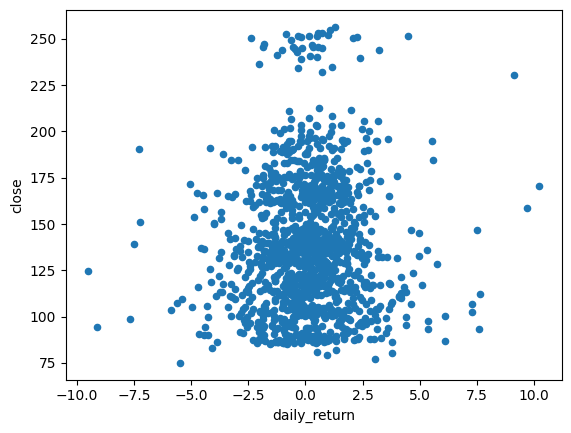


the correlation between daily_pct_change and close is =  0.024760038432462085


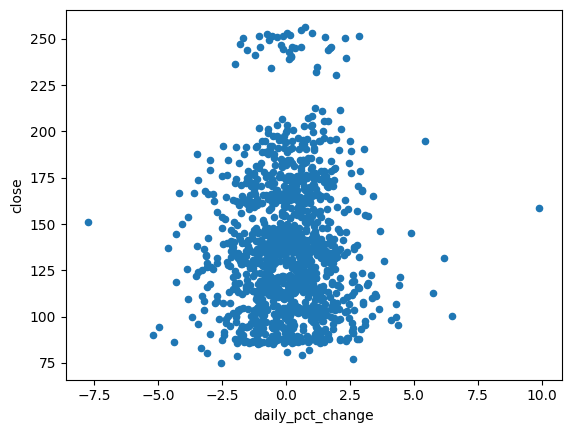


the correlation between price_range and close is =  0.40157535663507055


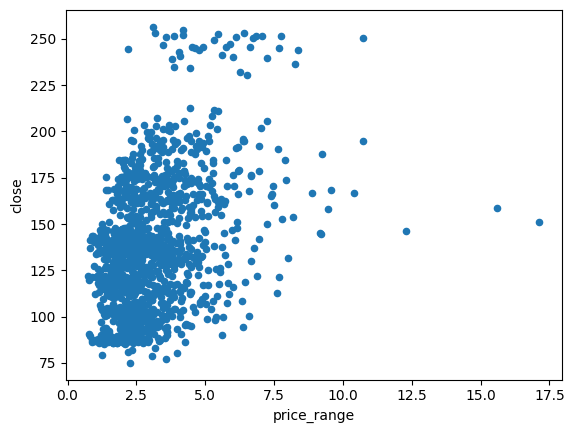


the correlation between cumulative_return and close is =  0.9999999999999997


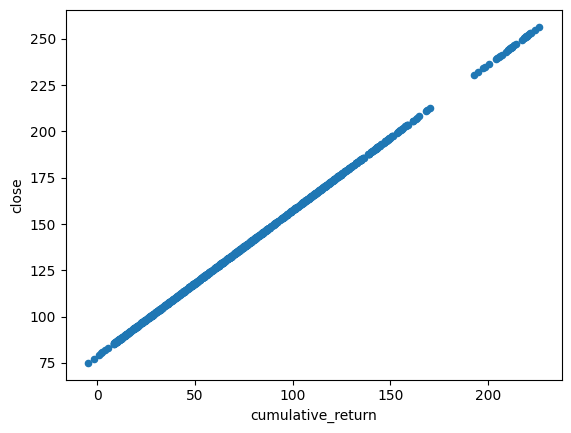

In [ ]:
target = 'close'
num_cols = ['open', 'high', 'low', 'volume', 'daily_return', 'daily_pct_change', 'price_range', 'cumulative_return']

for col in num_cols:
  print(f'\nthe correlation between {col} and {target} is = ', df_stocks[target].corr(df_stocks[col]))
  df_stocks.plot(kind='scatter', x = col, y = target)
  plt.xlabel(col)
  plt.ylabel(target)
  plt.show()

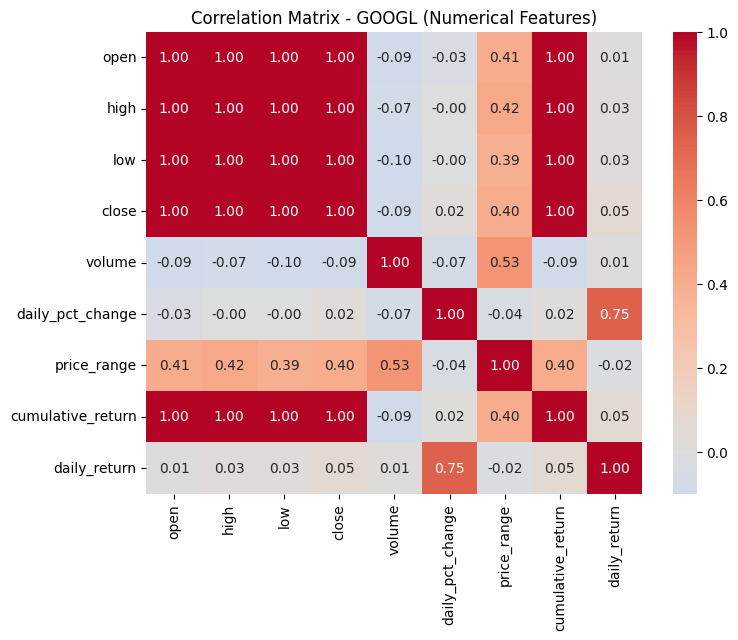

=== Correlations with Target (GOOGL) ===
open               → Pearson:  0.009 | Spearman:  0.010
high               → Pearson:  0.029 | Spearman:  0.032
low                → Pearson:  0.031 | Spearman:  0.034
close              → Pearson:  0.051 | Spearman:  0.056
volume             → Pearson:  0.012 | Spearman: -0.005
daily_pct_change   → Pearson:  0.745 | Spearman:  0.784
price_range        → Pearson: -0.023 | Spearman: -0.012
cumulative_return  → Pearson:  0.051 | Spearman:  0.056


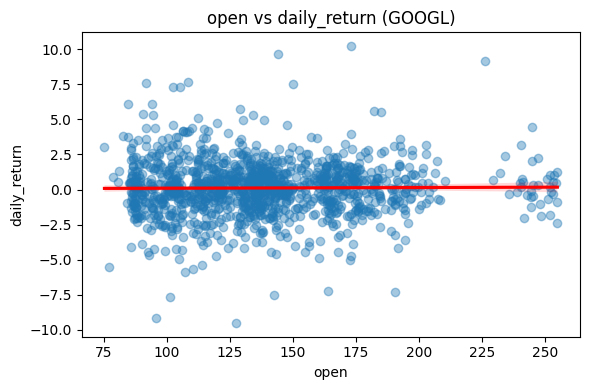

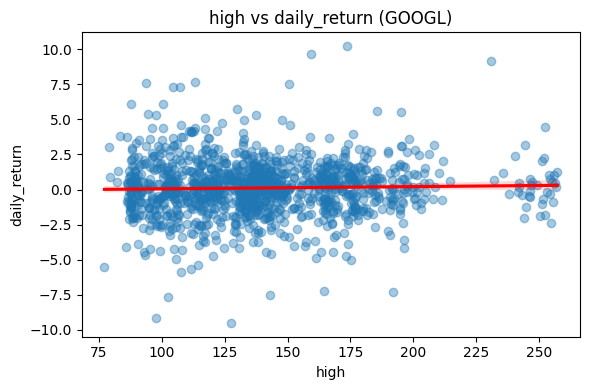

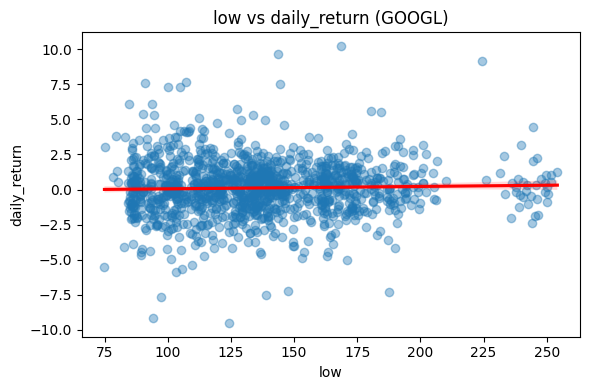

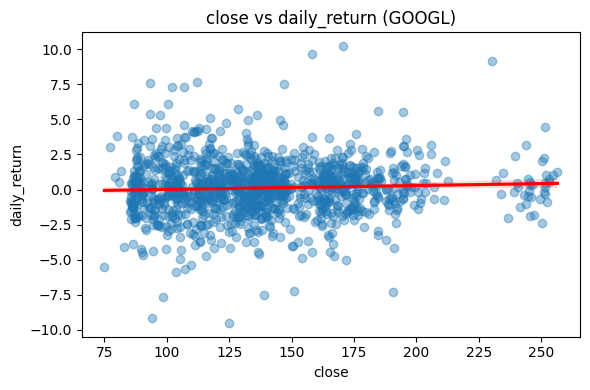

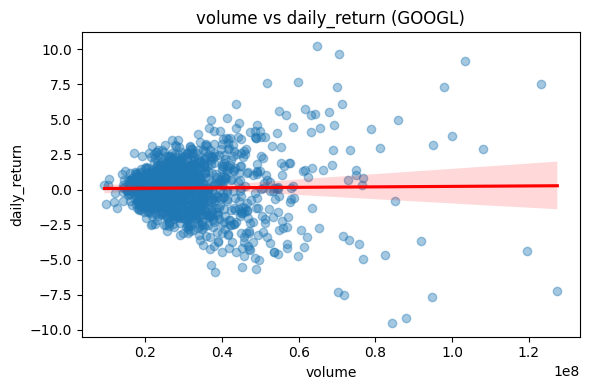

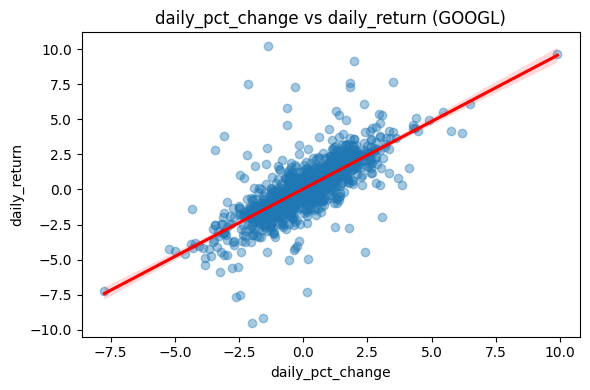

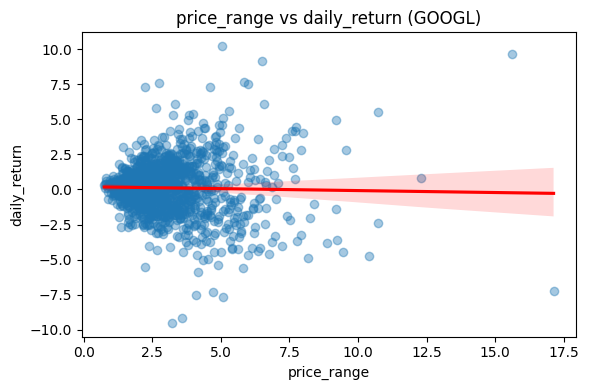

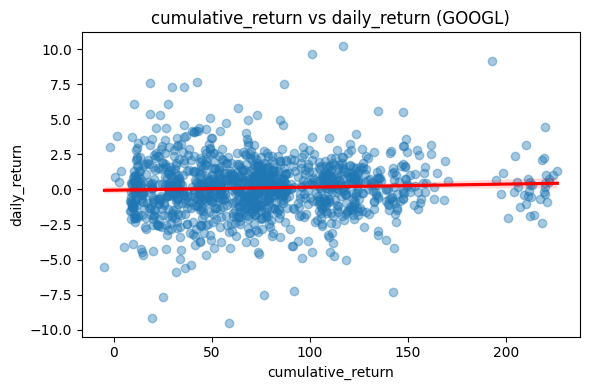


=== Summary ===
                   pearson  spearman
feature                             
open                 0.009     0.010
high                 0.029     0.032
low                  0.031     0.034
close                0.051     0.056
volume               0.012    -0.005
daily_pct_change     0.745     0.784
price_range         -0.023    -0.012
cumulative_return    0.051     0.056


In [ ]:
target = 'daily_return'
num_cols = ['open', 'high', 'low', 'close', 'volume',
            'daily_pct_change', 'price_range', 'cumulative_return']

# ---------- Correlation Matrix ----------
plt.figure(figsize=(8,6))
corr_matrix = df_stocks[num_cols + [target]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix - GOOGL (Numerical Features)")
plt.show()

# ---------- Individual Correlations ----------
print("=== Correlations with Target (GOOGL) ===")
corr_summary = []
for col in num_cols:
    pearson = df_stocks[target].corr(df_stocks[col], method='pearson')
    spearman = df_stocks[target].corr(df_stocks[col], method='spearman')
    corr_summary.append({'feature': col, 'pearson': pearson, 'spearman': spearman})
    print(f"{col:<18} → Pearson: {pearson:>6.3f} | Spearman: {spearman:>6.3f}")

df_corr_summary = pd.DataFrame(corr_summary).set_index('feature')

# ---------- Scatter Plots with Trendlines ----------
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.regplot(x=col, y=target, data=df_stocks, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.title(f"{col} vs {target} (GOOGL)")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

# ---------- Summary Table ----------
print("\n=== Summary ===")
print(df_corr_summary.round(3))

In [ ]:
import pandas as pd

# --- Assuming df_stocks has columns: date, close, volume, daily_return ---
df_stocks = df_stocks.sort_values('date')

# 1️⃣ Lag features (momentum)
df_stocks['return_lag_1'] = df_stocks['daily_return'].shift(1)
df_stocks['return_lag_2'] = df_stocks['daily_return'].shift(2)
df_stocks['return_lag_3'] = df_stocks['daily_return'].shift(3)
df_stocks['return_lead_1'] = df_stocks['daily_return'].shift(-1)
df_stocks['return_lead_2'] = df_stocks['daily_return'].shift(-2)

# 2️⃣ Rolling statistics (trend + volatility)
df_stocks['rolling_mean_3'] = df_stocks['daily_return'].rolling(window=3).mean()
df_stocks['rolling_std_3'] = df_stocks['daily_return'].rolling(window=3).std()
df_stocks['rolling_std_7'] = df_stocks['daily_return'].rolling(window=7).std()

# 3️⃣ Moving Averages of Close Price
df_stocks['ma_7'] = df_stocks['close'].rolling(window=7).mean()
df_stocks['ma_30'] = df_stocks['close'].rolling(window=30).mean()

# 4️⃣ RSI (Relative Strength Index)
delta = df_stocks['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df_stocks['rsi_14'] = 100 - (100 / (1 + rs))

# 5️⃣ MACD (Trend momentum)
ema_12 = df_stocks['close'].ewm(span=12, adjust=False).mean()
ema_26 = df_stocks['close'].ewm(span=26, adjust=False).mean()
df_stocks['macd'] = ema_12 - ema_26

# 6️⃣ Volume Change (%)
df_stocks['volume_change'] = df_stocks['volume'].pct_change()

# 7️⃣ Drop initial NaNs (due to rolling windows)
df_stocks = df_stocks.dropna()

# --- Compute correlation matrix ---
features = [
    'return_lag_1', 'return_lag_2', 'return_lag_3',
    'rolling_mean_3', 'rolling_std_3', 'rolling_std_7',
    'ma_7', 'ma_30', 'rsi_14', 'macd', 'volume_change'
]

corr_results = pd.DataFrame({
    'pearson': [df_stocks['daily_return'].corr(df_stocks[f]) for f in features],
    'spearman': [df_stocks['daily_return'].corr(df_stocks[f], method='spearman') for f in features]
}, index=features)

print(corr_results.sort_values(by='pearson', ascending=False))


                 pearson  spearman
rolling_mean_3  0.571070  0.530272
rsi_14          0.251272  0.232392
macd            0.054477  0.041269
rolling_std_7   0.001674  0.005577
ma_7           -0.001419  0.007532
ma_30          -0.005748  0.007685
return_lag_2   -0.010457 -0.026880
return_lag_1   -0.012400 -0.002677
rolling_std_3  -0.023596  0.004659
return_lag_3   -0.064688 -0.075611
volume_change  -0.092344 -0.037558


In [ ]:
merged_df = df_stocks.merge(df_news, on = ['ticker', 'date'], how = 'inner')
merged_df.head()

,date,open,high,low,close,volume,ticker,daily_pct_change,price_range,daily_return,...,rolling_std_7,ma_7,ma_30,rsi_14,macd,volume_change,headline,source,sentiment_label,sentiment_score
0,2025-10-13,240.210007,244.500000,239.710007,244.149994,24995000.0,googl,1.640226,4.789993,3.204120,...,2.001703,244.058570,243.045582,40.496052,3.777062,-0.246692,"Stock market today: S&P 500 and Dow rise, Nasd...",yahoo entertainment,negative,0.999996
1,2025-10-13,240.210007,244.500000,239.710007,244.149994,24995000.0,googl,1.640226,4.789993,3.204120,...,2.001703,244.058570,243.045582,40.496052,3.777062,-0.246692,Stocks Settle Sharply Higher on Trade Hopes an...,barchart.com,neutral,0.999998
2,2025-10-13,240.210007,244.500000,239.710007,244.149994,24995000.0,googl,1.640226,4.789993,3.204120,...,2.001703,244.058570,243.045582,40.496052,3.777062,-0.246692,"US stock markets surged sharply today, reversi...",the times of india,neutral,0.999951
3,2025-10-13,240.210007,244.500000,239.710007,244.149994,24995000.0,googl,1.640226,4.789993,3.204120,...,2.001703,244.058570,243.045582,40.496052,3.777062,-0.246692,Prediction: Alphabet (GOOG)(GOOGL) Will Soar O...,biztoc.com,neutral,0.927957
4,2025-10-14,241.229996,247.119995,240.509995,245.449997,22111600.0,googl,1.749368,6.610001,0.532461,...,2.014058,244.072854,244.188543,47.671528,3.626361,-0.115359,Alphabet (GOOGL) Price Target Lifted to $294 b...,yahoo entertainment,neutral,1.000000


In [ ]:
senti_df = merged_df.groupby('sentiment_label')['return_lead_1'].median().reset_index()
senti_df

,sentiment_label,return_lead_1
0,negative,0.491095
1,neutral,0.532461
2,positive,0.611410


In [ ]:
senti_df = merged_df.groupby('sentiment_label')['return_lag_1'].median().reset_index()
senti_df

,sentiment_label,return_lag_1
0,negative,1.283058
1,neutral,0.731725
2,positive,1.283058


In [ ]:
senti_df = merged_df.groupby('sentiment_label')['return_lead_2'].median().reset_index()
senti_df

,sentiment_label,return_lead_2
0,negative,0.552266
1,neutral,0.552266
2,positive,0.521681
